<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/desafio_kaggle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from pycaret.classification import *

In [4]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [5]:
df_churn_train_copy = df_churn_train.copy()

In [6]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [8]:
#contar a variavel target
df_churn_train['churn'].value_counts()

0    4139
1    1495
Name: churn, dtype: int64

In [9]:
df_churn_train['churn'].shape

(5634,)

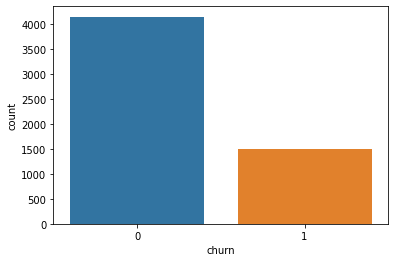

In [10]:
sns.countplot( x ='churn', data = df_churn_train)

In [11]:
#(linhas, colunas) do df
df_churn_train.shape

(5634, 21)

###análise tenure

Text(0.5, 1.0, 'box tenure')

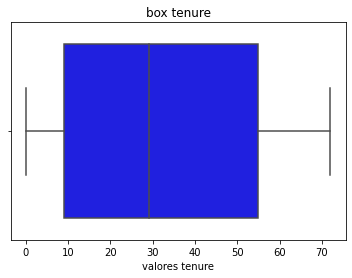

In [12]:
#plota usando o Seaborn, somente tenure é float

plt.subplot(1,1, 1)
fig = sns.boxplot(x = 'tenure', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores tenure')
fig.set_title('box tenure')


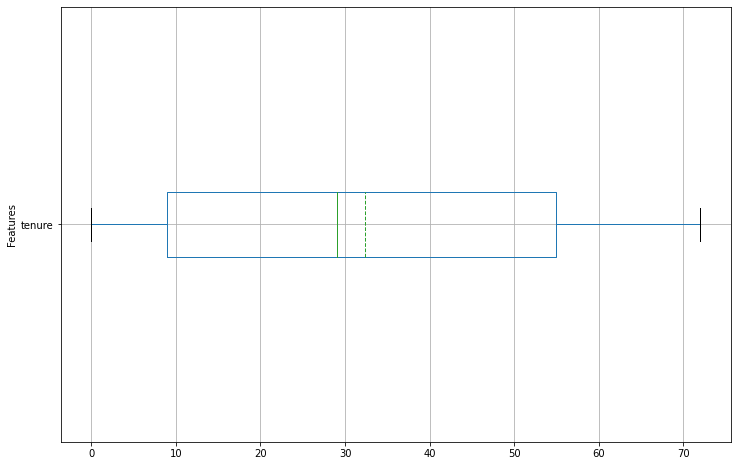

In [13]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [14]:
#isna para serie e df
#no df é mais detalhada
df_churn_train[['tenure']].isna().sum()

tenure    461
dtype: int64

In [15]:
#29(53); 9 (81); 55(48), substutir por 27
mp_q = (9*81+29*53+55*48)/(53+81+48)
mp_q

26.956043956043956

In [16]:
df_churn_train[df_churn_train['tenure']==55].count()

id                  48
gender              48
seniorcitizen       48
partner             48
dependents          46
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [17]:
#substituição dos na por mp_q = 27
df_churn_train['tenure'].fillna(27, inplace = True)

In [18]:
df_churn_train[df_churn_train['tenure'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


###tratar dependentes

In [19]:
#df_churn_train
l_index_churn_na_dep = list(df_churn_train[df_churn_train['dependents'].isna()].index)
l_index_churn_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [20]:
#tratamento da feature dependents no df_churn_train
s = 0
for c in l_index_churn_na_dep:
    s = s + 1  
    if s < 65:
        df_churn_train['dependents'][c] = 'Yes'
    else:
        df_churn_train['dependents'][c] = 'No'

In [21]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

###tratamento paymentmethod

In [22]:
#lista isna df_churn_train
l_index_pay_c = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [23]:
#tratamento da feature dependents no df_churn_train
b = 0
for c in l_index_pay_c:
    b = b + 1  
    if b <= 32:
        if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Electronic check'
        else:
            df_churn_train['paymentmethod'][c] = 'Electronic check'
    if b <= 54:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Mailed check'
         else:
            df_churn_train['paymentmethod'][c] = 'Mailed check'
    if b <= 77:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Credit card (automatic)'
         else:
            df_churn_train['paymentmethod'][c] = 'Credit card (automatic)'
    if b <= 99:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Bank transfer (automatic)'
         else:
            df_churn_train['paymentmethod'][c] = 'Bank transfer (automatic)'


In [24]:
df_churn_train['paymentmethod'].value_counts()

Electronic check             1887
Bank transfer (automatic)    1311
Mailed check                 1272
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [25]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

###totalcharges

In [26]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',', '.')
df_churn_train['totalcharges'] = pd.to_numeric(df_churn_train['totalcharges'], errors= 'coerce')

In [27]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),45.05,2560.10,0
1,6731,Male,0,Yes,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


In [28]:
df_churn_train[['totalcharges']].isna().sum()

totalcharges    8
dtype: int64

In [29]:
c = list(df_churn_train[df_churn_train['totalcharges'].isna()].index)
c

[161, 416, 1766, 2145, 3375, 3404, 4008, 5151]

In [30]:
df_churn_train['tenure'][161]

0.0

In [31]:
#df_churn_train['monthlycharges'][161]
for i in c:
    df_churn_train['totalcharges'][i] = df_churn_train['monthlycharges'][i]


In [32]:
df_churn_train['totalcharges'][5151]

56.05

###tratando as categoricas

In [33]:
df_churn_train.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_train.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)
#df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [34]:
df_churn_train.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_train.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_train.contract.replace(['Two year', 'One year', 'Month-to-month'], [2,1,0], inplace=True)
df_churn_train.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_train.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_train.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 



In [35]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [36]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,1,0,0,No,56.0,0,3,2,1,1,1,1,0,0,2,0,2,45.05,2560.10,0
1,6731,0,0,1,Yes,27.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,6479,1,0,1,No,60.0,1,1,1,0,1,1,1,1,1,2,1,4,110.80,6640.70,0
3,6861,1,0,0,No,37.0,1,1,1,0,1,1,0,1,1,0,1,2,101.90,3545.35,1
4,3266,0,0,1,Yes,29.0,1,0,1,0,0,0,0,0,0,0,1,1,70.75,1974.80,1


In [37]:
df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [38]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,1,0,0,0,56.0,0,3,2,1,1,1,1,0,0,2,0,2,45.05,2560.10,0
1,6731,0,0,1,1,27.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,6479,1,0,1,0,60.0,1,1,1,0,1,1,1,1,1,2,1,4,110.80,6640.70,0
3,6861,1,0,0,0,37.0,1,1,1,0,1,1,0,1,1,0,1,2,101.90,3545.35,1
4,3266,0,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,1,70.75,1974.80,1


In [39]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

###aplicando o autolml

In [40]:
clf = setup(data = df_churn_train,
            target = 'churn',
            #numeric_features = ['tenure', 'monthlycharges', 'totalcharges'] 
            #numeric_imputation = 'mean'
            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
            'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'], # lista das variáveis categóricas
            ignore_features = ['id'], 
            silent = False)

,Description,Value
0,session_id,5297
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8144,0.8567,0.7307,0.8069,0.8083,0.4889,0.4932,0.533
catboost,CatBoost Classifier,0.8141,0.8549,0.7297,0.8067,0.8077,0.4869,0.4920,3.492
lr,Logistic Regression,0.8098,0.8521,0.7292,0.8030,0.8046,0.4808,0.4842,0.399
ridge,Ridge Classifier,0.8098,0.0000,0.7207,0.8011,0.8025,0.4715,0.4771,0.019
lightgbm,Light Gradient Boosting Machine,0.8068,0.8445,0.7237,0.7992,0.8011,0.4708,0.4743,0.117
ada,Ada Boost Classifier,0.8065,0.8522,0.7273,0.8006,0.8020,0.4753,0.4783,0.224
lda,Linear Discriminant Analysis,0.8050,0.8490,0.7288,0.7995,0.8012,0.4745,0.4765,0.034
rf,Random Forest Classifier,0.8037,0.8388,0.7105,0.7944,0.7955,0.4521,0.4585,0.697
xgboost,Extreme Gradient Boosting,0.7941,0.8372,0.7097,0.7869,0.7889,0.4399,0.4428,0.838
et,Extra Trees Classifier,0.7933,0.8149,0.7026,0.7840,0.7863,0.4297,0.4339,0.669


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5297, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8152,0.8504,0.7305,0.8068,0.8087,0.4902,0.4946
1,0.8329,0.8760,0.7330,0.8258,0.8219,0.5182,0.5329
2,0.7975,0.8350,0.7122,0.7889,0.7916,0.4469,0.4496
3,0.8350,0.8804,0.7503,0.8279,0.8278,0.5396,0.5469
4,0.7970,0.8488,0.7067,0.7873,0.7902,0.4386,0.4422
5,0.8198,0.8492,0.7445,0.8136,0.8156,0.5101,0.5121
6,0.7995,0.8694,0.7180,0.7922,0.7949,0.4549,0.4567
7,0.8223,0.8535,0.7494,0.8166,0.8186,0.5186,0.5203
8,0.8223,0.8608,0.7462,0.8159,0.8179,0.5154,0.5178
9,0.8020,0.8439,0.7165,0.7936,0.7962,0.4563,0.4592


In [43]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8127,0.8502,0.7288,0.8044,0.8065,0.4849,0.4888
1,0.8253,0.8724,0.7153,0.8177,0.8114,0.4873,0.5068
2,0.7873,0.8372,0.6991,0.7781,0.7812,0.4192,0.4218
3,0.8401,0.8873,0.7632,0.8338,0.8345,0.5597,0.5647
4,0.7944,0.8537,0.6986,0.7834,0.7862,0.4258,0.4306
5,0.8198,0.8552,0.7445,0.8136,0.8156,0.5101,0.5121
6,0.8249,0.8706,0.7543,0.8197,0.8215,0.5270,0.5285
7,0.8147,0.8596,0.7347,0.8075,0.8097,0.4929,0.4956
8,0.8274,0.8637,0.7496,0.8207,0.8224,0.5260,0.5293
9,0.8071,0.8471,0.7327,0.8016,0.8038,0.4808,0.4819


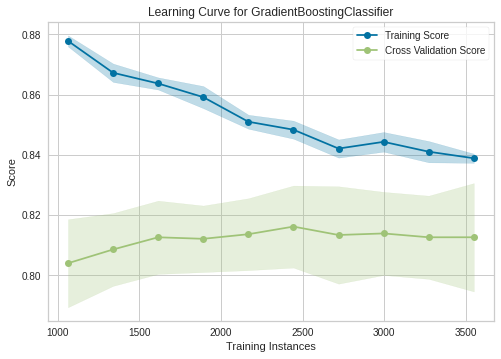

In [44]:
plot_model(estimator = tuned_gbc, plot = 'learning')

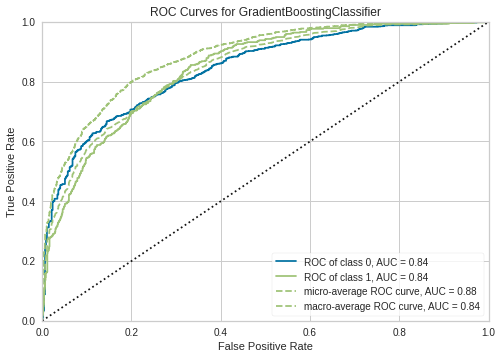

In [45]:
plot_model(estimator = tuned_gbc, plot = 'auc')

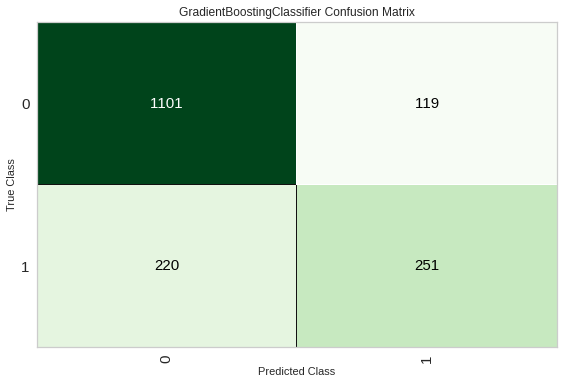

In [46]:
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

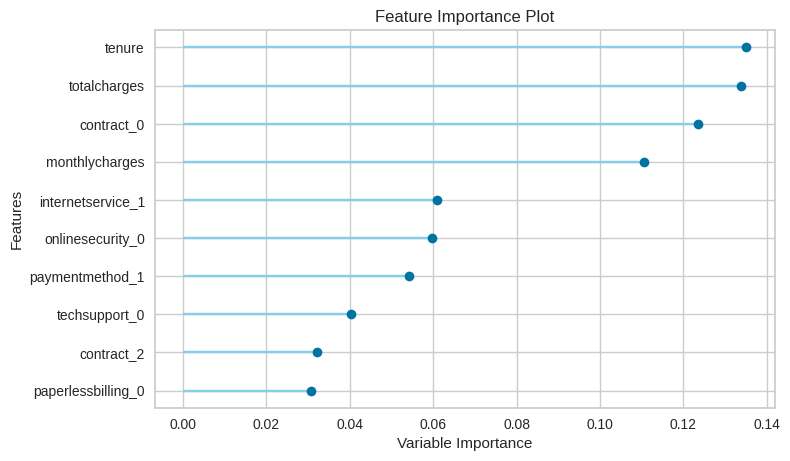

In [48]:
plot_model(estimator = tuned_gbc, plot = 'feature')

In [49]:
catb = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8051,0.8404,0.7173,0.7959,0.7982,0.4623,0.4664
1,0.8228,0.8651,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8294,0.7025,0.7826,0.7856,0.4293,0.4327
3,0.8299,0.8799,0.7406,0.8221,0.8217,0.5222,0.5307
4,0.8071,0.8514,0.7136,0.7970,0.7989,0.4594,0.4651
5,0.8249,0.8555,0.7479,0.8183,0.8201,0.5207,0.5235
6,0.8096,0.8649,0.7376,0.8047,0.8067,0.4893,0.4902
7,0.8020,0.8548,0.7165,0.7936,0.7962,0.4563,0.4592
8,0.8274,0.8660,0.7592,0.8227,0.8244,0.5354,0.5367
9,0.8198,0.8416,0.7508,0.8152,0.8170,0.5165,0.5175


In [51]:
tuned_catb = tune_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.8445,0.7290,0.8089,0.8101,0.4921,0.4981
1,0.8228,0.8693,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8402,0.7088,0.7844,0.7873,0.4368,0.4388
3,0.8376,0.8794,0.7552,0.8308,0.8308,0.5482,0.5549
4,0.8046,0.8464,0.7214,0.7967,0.7993,0.4651,0.4677
5,0.8274,0.8530,0.7496,0.8207,0.8224,0.5260,0.5293
6,0.8122,0.8697,0.7266,0.8037,0.8059,0.4807,0.4846
7,0.8274,0.8569,0.7592,0.8227,0.8244,0.5354,0.5367
8,0.8299,0.8621,0.7481,0.8227,0.8239,0.5283,0.5330
9,0.7995,0.8398,0.7244,0.7942,0.7964,0.4620,0.4629


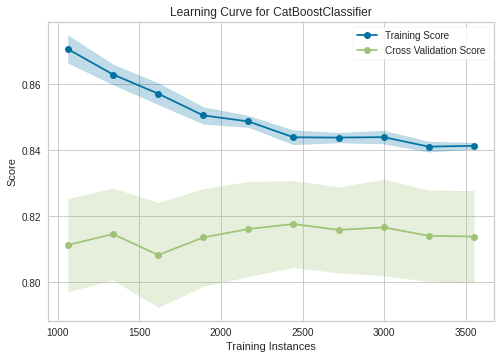

In [52]:
plot_model(estimator = tuned_catb, plot = 'learning')

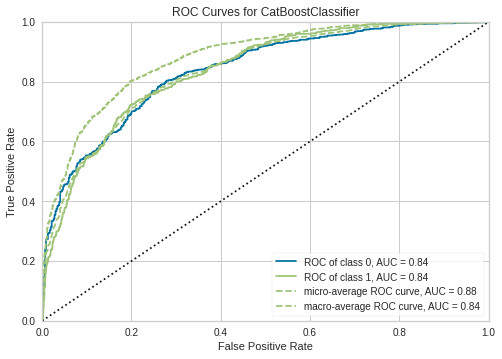

In [55]:
plot_model(estimator = tuned_catb, plot = 'auc')

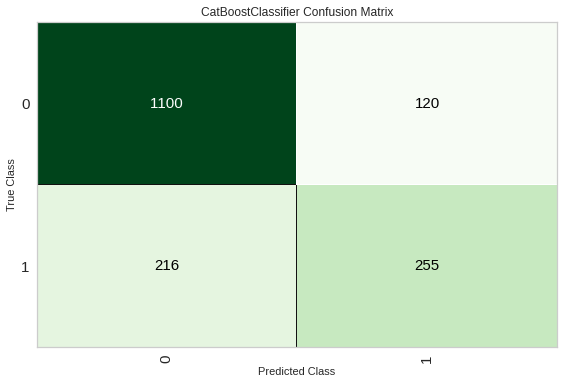

In [56]:
plot_model(estimator = tuned_catb, plot = 'confusion_matrix')

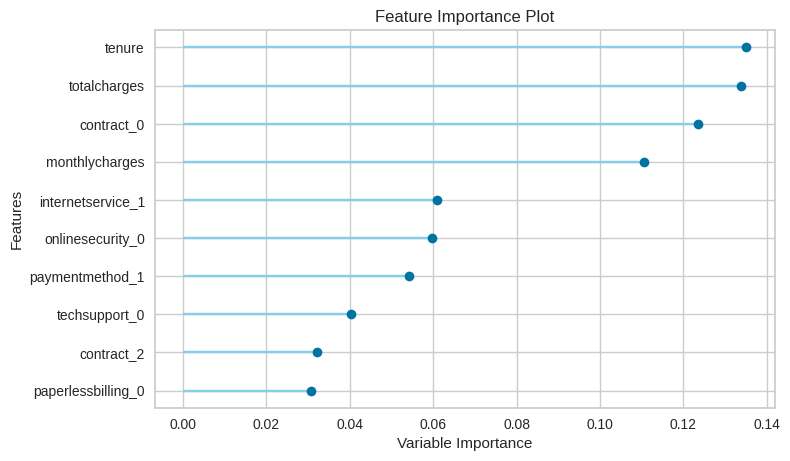

In [57]:
plot_model(estimator = tuned_gbc, plot = 'feature')